# Question 1

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

tf.__version__

2024-12-11 14:07:16.530361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733947636.580843   41047 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733947636.593899   41047 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 14:07:16.627851: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.18.0'

In [2]:
#!wget https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/model_2024_hairstyle.keras

In [3]:
model = keras.models.load_model('model_2024_hairstyle.keras')

I0000 00:00:1733947640.123195   41047 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:07:00.0, compute capability: 8.6


In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [5]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp9yicww2s/assets


INFO:tensorflow:Assets written to: /tmp/tmp9yicww2s/assets


Saved artifact at '/tmp/tmp9yicww2s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140448786477136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140448786477904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140448786477712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140448786479632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140448786480784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140448786480976: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1733947643.426674   41047 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1733947643.426853   41047 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-12-11 14:07:23.428312: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp9yicww2s
2024-12-11 14:07:23.428790: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-11 14:07:23.428801: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp9yicww2s
I0000 00:00:1733947643.432101   41047 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-12-11 14:07:23.434312: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-11 14:07:23.535427: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp9yicww2s
2024-12-11 14:07:23.542136: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [6]:
with open('hair-style.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [7]:
!ls -lh hair-style.tflite

-rw-r--r-- 1 maxkaizo maxkaizo 77M Dec 11 14:07 hair-style.tflite


Now convert this model from Keras to TF-Lite format.

What's the size of the converted model?

77 M

# Question 2

In [8]:
import tensorflow.lite as tflite

In [9]:
interpreter = tflite.Interpreter(model_path='hair-style.tflite')
interpreter.allocate_tensors()          #load weights from model

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
interpreter.get_input_details()

[{'name': 'serving_default_input_layer:0',
  'index': 0,
  'shape': array([  1, 200, 200,   3], dtype=int32),
  'shape_signature': array([ -1, 200, 200,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [11]:
interpreter.get_input_details()[0]['index']

0

In [12]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 13,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [13]:
interpreter.get_output_details()[0]['index']

13

To be able to use this model, we need to know the index of the input and the index of the output.

What's the output index for this model?

Answer: 13

Preparing the image

In [14]:
# !pip install pillow

You'll need some code for downloading and resizing images. You can use this code:

In [15]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

Let's download and resize this image:

https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

Based on the previous homework, what should be the target size for the image?


I think it should be 200, 200

In [16]:
labimg = download_image('https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg')

In [17]:
labimg = prepare_image(labimg, (200,200))

# Question 3

Now we need to turn the image into numpy array and pre-process it.

Tip: Check the previous homework. What was the pre-processing we did there?

-The pre process in hw 8 was: "ImageDataGenerator(rescale=1./255)"

First turn the image into an array

In [18]:
x = np.array(labimg, dtype='float32')
X = np.array([x])

pixel before pre processing

In [19]:
X.round(2)[0][0][0]

array([ 61., 104.,  22.], dtype=float32)

In [20]:
x[0][0]

array([ 61., 104.,  22.], dtype=float32)

pre process function

In [21]:
def preprocess_input(x):
    x /= 255
    return x

pre process image and imagge array

In [22]:
X = preprocess_input(X)
x = preprocess_input(x)

after pre processing

In [23]:
X.round(2)[0][0][0]

array([0.24, 0.41, 0.09], dtype=float32)

In [24]:
x.round(2)[0][0]

array([0.24, 0.41, 0.09], dtype=float32)

# Question 4

Now let's apply this model to this image. What's the output of the model?

In [25]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [26]:
preds

array([[0.8934675]], dtype=float32)

Answer = 0.89

In [28]:
float_predictions = preds[0].tolist()

In [29]:
float_predictions

[0.8934674859046936]

### test

In [32]:
import script

In [35]:
url = 'https://vilanolabs.com/wp-content/uploads/2023/03/peinados-para-pelo-liso.jpg'

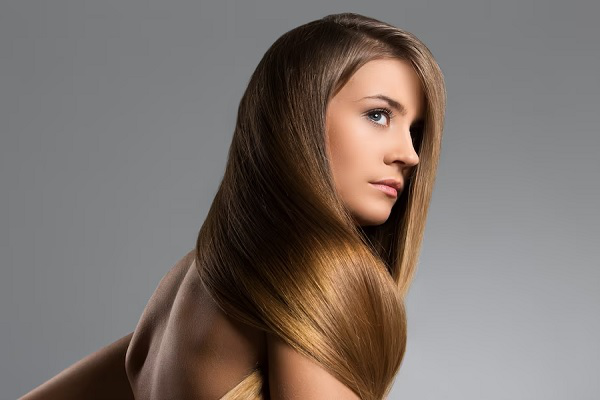

In [38]:
test_img = script.download_image(url)
test_img

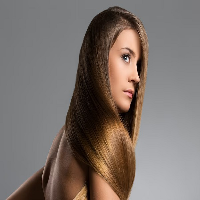

In [41]:
resized_img = script.prepare_image(test_img, (200,200))
resized_img

In [43]:
processed_matrix = script.preprocess_input(resized_img)
processed_matrix

array([[[[0.4627451 , 0.46666667, 0.4745098 ],
         [0.4627451 , 0.46666667, 0.4745098 ],
         [0.46666667, 0.47058824, 0.47843137],
         ...,
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608]],

        [[0.4627451 , 0.46666667, 0.4745098 ],
         [0.4627451 , 0.46666667, 0.4745098 ],
         [0.4627451 , 0.46666667, 0.4745098 ],
         ...,
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608]],

        [[0.4627451 , 0.46666667, 0.4745098 ],
         [0.4627451 , 0.46666667, 0.4745098 ],
         [0.4627451 , 0.46666667, 0.4745098 ],
         ...,
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608],
         [0.48235294, 0.48235294, 0.49019608]],

        ...,

        [[0.4745098 , 0.47843137, 0.49411765],
         [0.4745098 , 0.47843137, 0.49411765]

In [44]:
script.predict(url)

[0.9399181008338928]

# Question 5

Download the base image agrigorev/model-2024-hairstyle:v3. You can do it with docker pull.

So what's the size of this base image?

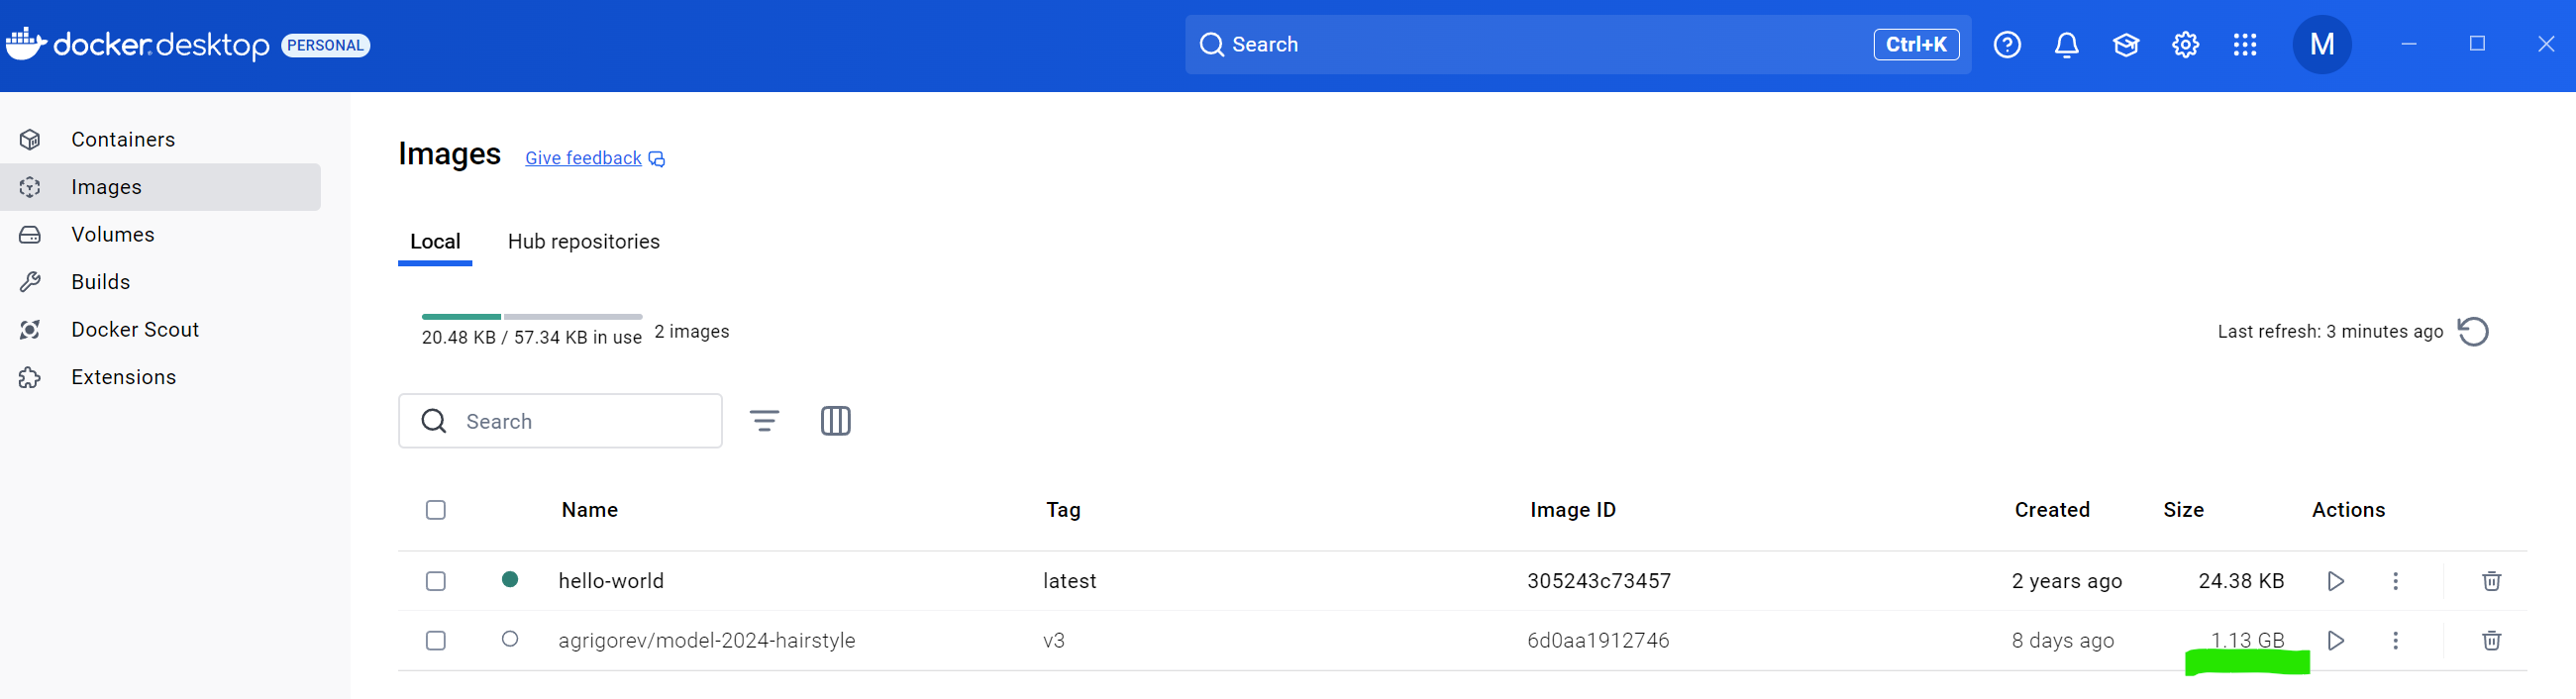

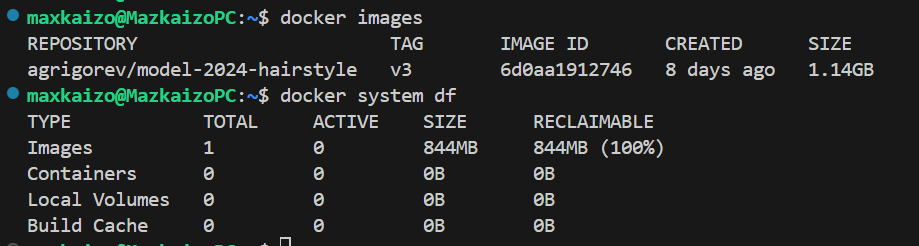

Answer = 782

Question 6

Model uotput = 0.429


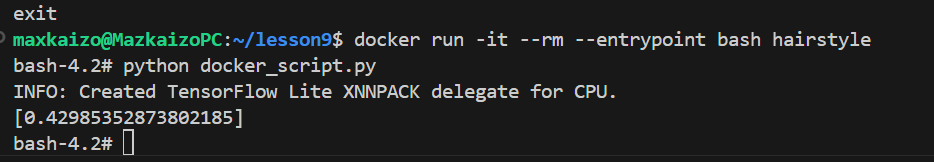

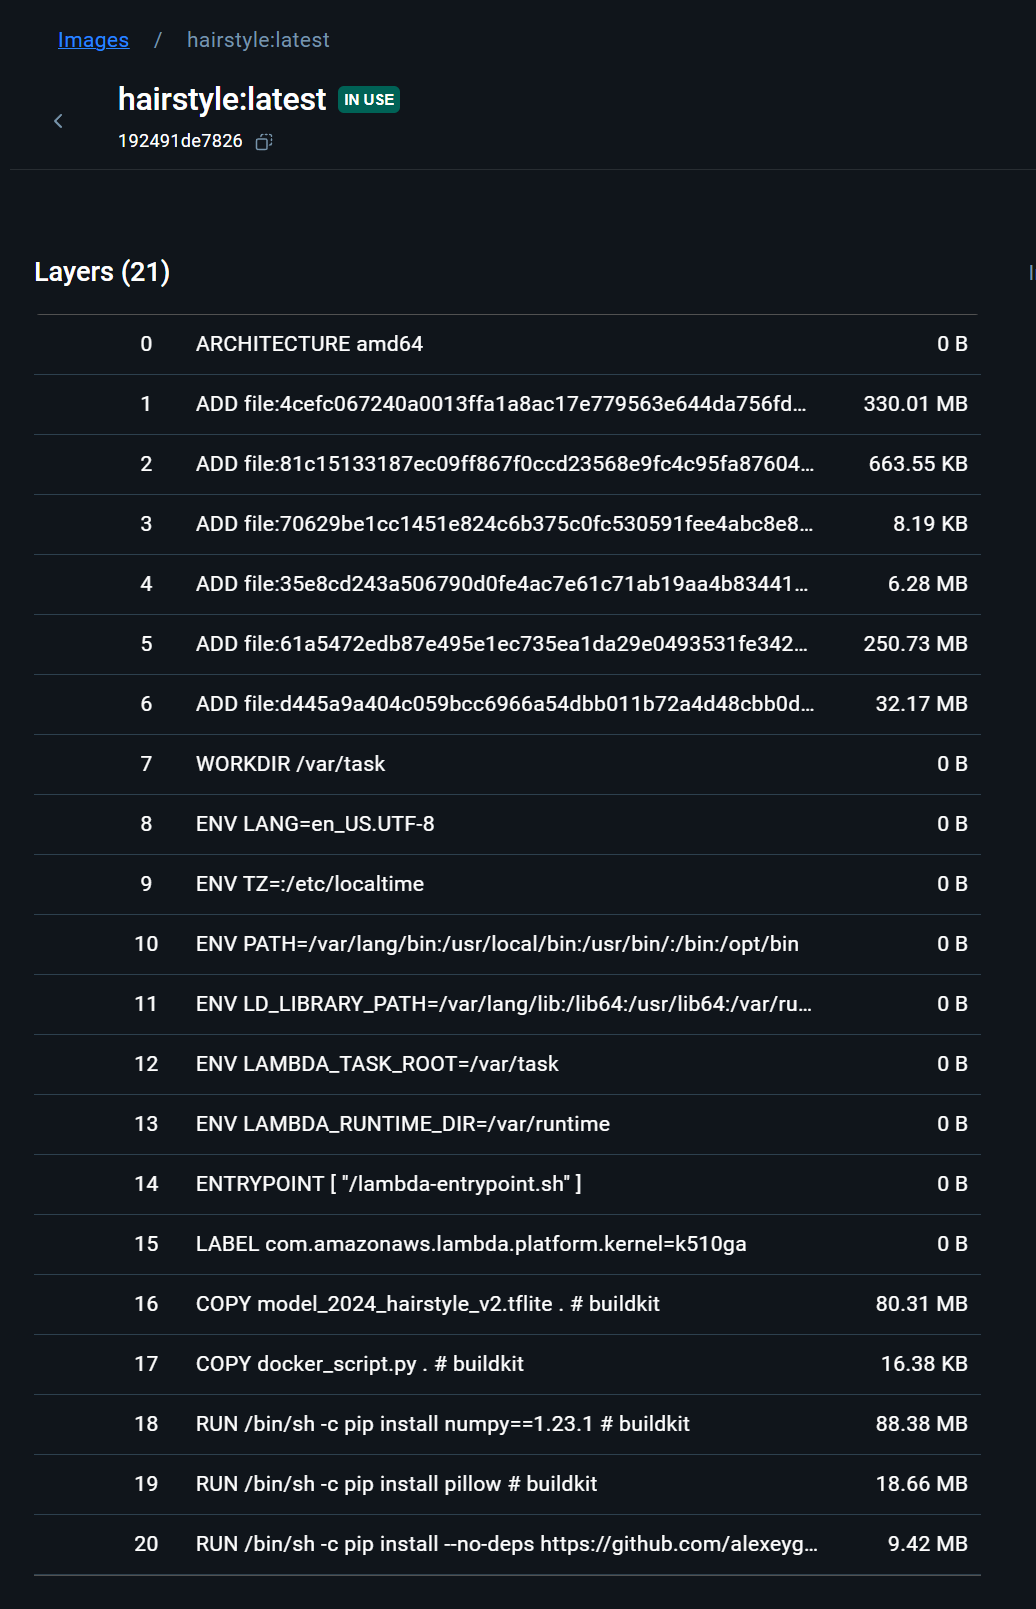